## Load and plot Templeton ephys data

In [97]:
#Import packages
import pandas as pd
import h5py
import numpy as np
import scipy as sp
import scipy.signal as sg
import xarray as xr
import os
import matplotlib.pyplot as plt
from matplotlib import patches
import ast
import glob

from DR_analysis_utils import Session, makePSTH, make_neuron_time_trials_tensor

%matplotlib notebook

In [291]:
#Set paths to experiment folders
main_path = [
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-07-26_14-09-36_620263\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-07-27_13-57-17_620263\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-08-02_15-40-19_620264\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-09-19_13-48-26_628801\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-09-26_12-48-09_636397\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-09-27_11-37-08_636397\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-12-05_13-08-02_644547\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2022-12-06_12-35-35_644547\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2023-01-17_11-39-17_646318\processed",
    r"\\allen\programs\mindscope\workgroups\templeton\TTOC\pilot recordings\2023-01-18_10-44-55_646318\processed",
    
]

mouseIDs = ['620263','620263','620264','628801','636397','636397','644547','644547','646318','646318']
exp_nums = [1,2, 1, 1, 1,2, 1,2, 1,2]

### Load/initialize data from one session

In [297]:
sel_session=0
session=Session(path=main_path[sel_session]) 

In [298]:
# trials table
session.trials

Unnamed: 0  trialStartFrame trialStimID trialstimRewarded  \
0             0                0        vis1              vis1   
1             1              419        vis1              vis1   
2             2              712        vis1              vis1   
3             3              993        vis1              vis1   
4             4             1308        vis1              vis1   
..          ...              ...         ...               ...   
668         668           214241      sound2              vis1   
669         669           214515      sound2              vis1   
670         670           214815      sound1              vis1   
671         671           215096      sound1              vis1   
672         672           215539       catch              vis1   

     trial_response  trial_rewarded  trial_sound_dur  trial_vis_stim_dur  \
0              True            True             0.00                 0.5   
1              True            True             0.00                 1.0   
2              True            True             0.00                 0.5   
3              True            True             0.00                 1.0   
4              True            True             0.00                 0.5   
..              ...             ...              ...                 ...   
668           False           False             1.00                 0.0   
669            True           False             0.50                 0.0   
670           False           False             0.75                 0.0   
671           False           False             1.00                 0.0   
672           False           False             0.00                 0.0   

     vis_go_trials  vis_nogo_trials  ...  aud_false_alarm_trials  \
0             True            False  ...                   False   
1             True            False  ...                   False   
2             True            False  ...                   False   
3             True            False  ...                   False   
4             True            False  ...                   False   
..             ...              ...  ...                     ...   
668          False            False  ...                   False   
669          False            False  ...                    True   
670          False            False  ...                   False   
671          False            False  ...                   False   
672          False            False  ...                   False   

     aud_miss_trials  aud_correct_reject_trials  aud_autoreward_trials  \
0              False                      False                  False   
1              False                      False                  False   
2              False                      False                  False   
3              False                      False                  False   
4              False                      False                  False   
..               ...                        ...                    ...   
668            False                       True                  False   
669            False                      False                  False   
670             True                      False                  False   
671             True                      False                  False   
672            False                      False                  False   

     catch_trials  catch_resp_trials  trialStimStartFrame  stimStartTime  \
0           False              False                  238     112.733125   
1           False              False                  531     117.620575   
2           False              False                  812     122.309625   
3           False              False                 1127     127.564025   
4           False              False                 1404     132.184510   
..            ...                ...                  ...            ...   
668         False              False               214334    

In [318]:
# units table
session.units

quality  peak_channel  waveform_duration probe  amplitude  \
id                                                                        
2207261420000     mua             0           0.699999     B   2.224999   
2207261420001     mua             4           0.266666     B   8.296205   
2207261420002    good             6           0.833332     B   5.614287   
2207261420003     mua             7           0.433333     B   5.634258   
2207261420004     mua            11           1.066665     B   2.530617   
...               ...           ...                ...   ...        ...   
2207261460511    good           140           0.666665     F   2.680193   
2207261460512     mua           160           0.633332     F   3.698878   
2207261460513    good           182           0.666665     F   6.767423   
2207261460514     mua            22           0.233333     F   3.493995   
2207261460515    good            78           0.633332     F   3.701524   

               index  cluster_id  firing_rate  presence_ratio  isi_viol  ...  \
id                                                                       ...   
2207261420000      0           0     2.980486            0.99  0.178932  ...   
2207261420001      1           1     0.356302            0.68  3.910602  ...   
2207261420002      2           2     3.828723            0.99  0.000000  ...   
2207261420003      3           3     0.109937            0.67  0.000000  ...   
2207261420004      4           4     7.191738            0.98  2.021784  ...   
...              ...         ...          ...             ...       ...  ...   
2207261460511    498         511     2.614897            0.99  0.058084  ...   
2207261460512    499         512     0.276298            0.97  0.000000  ...   
2207261460513    500         513     0.149143            0.23  0.000000  ...   
2207261460514    501         514     0.107287            0.70  0.000000  ...   
2207261460515    502         515     0.721607            0.99  0.000000  ...   

               isolation_distance   l_ratio   d_prime  nn_hit_rate  \
id                                                                   
2207261420000                 NaN       NaN       NaN          NaN   
2207261420001                 NaN       NaN       NaN          NaN   
2207261420002           34.409595  0.159389  3.846623     0.925333   
2207261420003           75.911772  0.000046  8.384570     0.992701   
2207261420004          615.015116  0.006297  3.757930     0.994667   
...                           ...       ...       ...          ...   
2207261460511           34.837735  0.142946  4.099546     0.917137   
2207261460512           13.925099  6.464554  2.749505     0.230769   
2207261460513           93.290306  0.196207  6.801480     0.824373   
2207261460514           49.637883  0.199848  8.345159     0.822021   
2207261460515           39.133562  0.082435  3.767563     0.934783   

               nn_miss_rate  silhouette_score  max_drift  cumulative_drift  \
id                                                                           
2207261420000           NaN          0.087672      23.15            234.44   
2207261420001           NaN          0.273897       8.15             27.98   
2207261420002      0.014425          0.180270      53.36            201.82   
2207261420003      0.000101               NaN      11.01             11.45   
2207261420004      0.028902          0.056854      27.56            197.07   
...                     ...               ...        ...               ...   
2207261460511      0.001018          0.100031      32.19            112.79   
2207261460512      0.001974               NaN      38.91             45.48   
2207261460513      0.001144          0.030752       2.75              2.02   
2207261460514      0.007090          0.010176       5.65             20.12   
2207261460515      0.000336               NaN       6.59             58.51   

                     epoch_name   area  
id                            

In [331]:
# add area labels if they exist
tissuecyte_path = r"\\allen\programs\mindscope\workgroups\np-behavior\tissuecyte"

session.units['area']=''
session.good_units['area']=''

if os.path.isdir(os.path.join(tissuecyte_path,mouseIDs[sel_session])):
    for probe in session.units['probe'].unique():
        channels_table_path=glob.glob(
            os.path.join(tissuecyte_path,mouseIDs[sel_session],
                         '*'+probe+str(exp_nums[sel_session])+'_channels*'))
        if len(channels_table_path)==1:
            channels_table=pd.read_csv(channels_table_path[0])
        else:
            continue
            
        for ic,chan in channels_table.iterrows():
            chan_units = session.units.query('peak_channel == @chan.channel and \
                                                probe == @probe').index
            if len(chan_units)>0:
                session.units['area'][chan_units] = chan['channel_areas']
                print(chan_units)
                print(chan.channel)
                print(chan.channel_areas)
            
            chan_units = session.good_units.query('peak_channel == @chan.channel and \
                                                    probe == @probe').index
            session.good_units['area'][chan_units] = chan['channel_areas']

            

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261420000], dtype='int64', name='id')
0
nan
Int64Index([2207261420001], dtype='int64', name='id')
4
nan
Int64Index([2207261420002], dtype='int64', name='id')
6
nan
Int64Index([2207261420003], dtype='int64', name='id')
7
nan
Int64Index([2207261420389], dtype='int64', name='id')
8
DG-mo
Int64Index([2207261420005, 2207261420390, 2207261420475, 2207261420500], dtype='int64', name='id')
9
DG-mo
Int64Index([2207261420004, 2207261420006], dtype='int64', name='id')
11
DG-mo
Int64Index([2207261420008], dtype='int64', name='id')
12
DG-mo
Int64Index([2207261420007, 2207261420009], dtype='int64', name='id')
13
DG-mo
Int64Index([2207261420510], dtype='int64', name='id')
14
DG-mo
Int64Index([2207261420010, 2207261420011, 2207261420012, 2207261420018,
            2207261420509],
           dtype='int64', name='id')
15
DG-mo
Int64Index([2207261420013], dtype='int64', name='id')
16
DG-mo
Int64Index([2207261420014, 2207261420015, 2207261420016, 2207261420391], dtype='int64', name='id')
1

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261420026, 2207261420027, 2207261420028, 2207261420029,
            2207261420395, 2207261420396, 2207261420512],
           dtype='int64', name='id')
27
DG-mo
Int64Index([2207261420025], dtype='int64', name='id')
28
DG-mo
Int64Index([2207261420030], dtype='int64', name='id')
29
DG-mo
Int64Index([2207261420031], dtype='int64', name='id')
32
DG-mo
Int64Index([2207261420397, 2207261420476, 2207261420501], dtype='int64', name='id')
33
DG-mo
Int64Index([2207261420032, 2207261420033], dtype='int64', name='id')
35
DG-mo
Int64Index([2207261420034, 2207261420035, 2207261420398, 2207261420402,
            2207261420477],
           dtype='int64', name='id')
36
DG-mo
Int64Index([2207261420036], dtype='int64', name='id')
38
DG-sg
Int64Index([2207261420037, 2207261420399, 2207261420400, 2207261420401,
            2207261420502],
           dtype='int64', name='id')
39
DG-sg
Int64Index([2207261420038, 2207261420039, 2207261420041], dtype='int64', name='id')
40
DG-sg
Int64Index([2207

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261420061, 2207261420063], dtype='int64', name='id')
54
DG-sg
Int64Index([2207261420060, 2207261420064, 2207261420065, 2207261420073,
            2207261420088, 2207261420411, 2207261420412, 2207261420413,
            2207261420481, 2207261420482],
           dtype='int64', name='id')
55
DG-sg
Int64Index([2207261420066, 2207261420067, 2207261420068, 2207261420408], dtype='int64', name='id')
56
DG-sg
Int64Index([2207261420069], dtype='int64', name='id')
57
DG-sg
Int64Index([2207261420070, 2207261420071], dtype='int64', name='id')
58
DG-sg
Int64Index([2207261420074], dtype='int64', name='id')
59
DG-sg
Int64Index([2207261420075, 2207261420079], dtype='int64', name='id')
60
DG-sg
Int64Index([2207261420076, 2207261420077, 2207261420078, 2207261420479], dtype='int64', name='id')
61
CA3
Int64Index([2207261420080, 2207261420081, 2207261420082], dtype='int64', name='id')
62
CA3
Int64Index([2207261420083, 2207261420084, 2207261420409, 2207261420522], dtype='int64', name='id')
63


C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261420123, 2207261420124, 2207261420125, 2207261420417,
            2207261420419],
           dtype='int64', name='id')
76
DG-po
Int64Index([2207261420119, 2207261420127], dtype='int64', name='id')
77
DG-po
Int64Index([2207261420128, 2207261420129, 2207261420131], dtype='int64', name='id')
78
DG-po
Int64Index([2207261420133, 2207261420137], dtype='int64', name='id')
79
DG-po
Int64Index([2207261420126, 2207261420130, 2207261420138, 2207261420139,
            2207261420140],
           dtype='int64', name='id')
80
DG-po
Int64Index([2207261420132, 2207261420141], dtype='int64', name='id')
81
DG-po
Int64Index([2207261420143], dtype='int64', name='id')
82
DG-po
Int64Index([2207261420146], dtype='int64', name='id')
83
DG-po
Int64Index([2207261420147], dtype='int64', name='id')
86
DG-po
Int64Index([2207261420151], dtype='int64', name='id')
87
DG-po
Int64Index([2207261420150, 2207261420153, 2207261420154], dtype='int64', name='id')
90
DG-sg
Int64Index([2207261420152, 220726142

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261420167, 2207261420168], dtype='int64', name='id')
104
DG-sg
Int64Index([2207261420420, 2207261420421, 2207261420485], dtype='int64', name='id')
105
DG-sg
Int64Index([2207261420170], dtype='int64', name='id')
106
DG-sg
Int64Index([2207261420171, 2207261420172, 2207261420423, 2207261420486,
            2207261420504],
           dtype='int64', name='id')
107
DG-mo
Int64Index([2207261420173, 2207261420513], dtype='int64', name='id')
108
DG-mo
Int64Index([2207261420169, 2207261420183, 2207261420424], dtype='int64', name='id')
109
DG-mo
Int64Index([2207261420176, 2207261420177], dtype='int64', name='id')
110
DG-mo
Int64Index([2207261420178, 2207261420179, 2207261420184, 2207261420185], dtype='int64', name='id')
112
DG-mo
Int64Index([2207261420174, 2207261420175, 2207261420180, 2207261420181,
            2207261420182, 2207261420514],
           dtype='int64', name='id')
113
DG-mo
Int64Index([2207261420186], dtype='int64', name='id')
114
DG-mo
Int64Index([2207261420189], d

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261420208, 2207261420209], dtype='int64', name='id')
126
CA1
Int64Index([2207261420204, 2207261420212, 2207261420213, 2207261420214,
            2207261420426, 2207261420427],
           dtype='int64', name='id')
128
CA1
Int64Index([2207261420215, 2207261420428], dtype='int64', name='id')
130
CA1
Int64Index([2207261420210, 2207261420217], dtype='int64', name='id')
131
CA1
Int64Index([2207261420211, 2207261420218], dtype='int64', name='id')
132
CA1
Int64Index([2207261420216], dtype='int64', name='id')
133
CA1
Int64Index([2207261420219], dtype='int64', name='id')
134
CA1
Int64Index([2207261420220, 2207261420221, 2207261420222], dtype='int64', name='id')
135
CA1
Int64Index([2207261420223], dtype='int64', name='id')
136
CA1
Int64Index([2207261420224], dtype='int64', name='id')
137
CA1
Int64Index([2207261420225, 2207261420226], dtype='int64', name='id')
138
CA1
Int64Index([2207261420227, 2207261420228], dtype='int64', name='id')
139
CA1
Int64Index([2207261420229, 22072614202

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261420242, 2207261420243, 2207261420244], dtype='int64', name='id')
153
CA1
Int64Index([2207261420245, 2207261420246, 2207261420432], dtype='int64', name='id')
154
CA1
Int64Index([2207261420247, 2207261420251], dtype='int64', name='id')
155
CA1
Int64Index([2207261420248], dtype='int64', name='id')
156
CA1
Int64Index([2207261420249, 2207261420250], dtype='int64', name='id')
157
CA1
Int64Index([2207261420253, 2207261420254, 2207261420433], dtype='int64', name='id')
160
CA1
Int64Index([2207261420252, 2207261420255, 2207261420256, 2207261420257,
            2207261420258, 2207261420434],
           dtype='int64', name='id')
161
CA1
Int64Index([2207261420259], dtype='int64', name='id')
162
CA1
Int64Index([2207261420260, 2207261420261, 2207261420435], dtype='int64', name='id')
164
CA1
Int64Index([2207261420263], dtype='int64', name='id')
165
CA1
Int64Index([2207261420264, 2207261420265], dtype='int64', name='id')
166
CA1
Int64Index([2207261420266, 2207261420267, 2207261420268

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261420276, 2207261420277], dtype='int64', name='id')
174
CA1
Int64Index([2207261420278, 2207261420279, 2207261420437, 2207261420438], dtype='int64', name='id')
175
CA1
Int64Index([2207261420280, 2207261420281, 2207261420282, 2207261420283,
            2207261420284, 2207261420285, 2207261420439],
           dtype='int64', name='id')
176
CA1
Int64Index([2207261420441, 2207261420487], dtype='int64', name='id')
177
CA1
Int64Index([2207261420286, 2207261420287, 2207261420288, 2207261420289,
            2207261420290, 2207261420291, 2207261420295, 2207261420440,
            2207261420442, 2207261420443, 2207261420488, 2207261420489,
            2207261420490],
           dtype='int64', name='id')
179
CA1
Int64Index([2207261420292, 2207261420293, 2207261420294, 2207261420444], dtype='int64', name='id')
180
CA1
Int64Index([2207261420445, 2207261420446, 2207261420447], dtype='int64', name='id')
181
CA1
Int64Index([2207261420296, 2207261420297, 2207261420298, 2207261420299,
    

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261420334, 2207261420458, 2207261420494], dtype='int64', name='id')
197
nan
Int64Index([2207261420335], dtype='int64', name='id')
198
nan
Int64Index([2207261420336, 2207261420337], dtype='int64', name='id')
199
nan
Int64Index([2207261420339, 2207261420340, 2207261420341, 2207261420367,
            2207261420459, 2207261420495, 2207261420506],
           dtype='int64', name='id')
200
nan
Int64Index([2207261420338, 2207261420342, 2207261420343, 2207261420344,
            2207261420460, 2207261420461],
           dtype='int64', name='id')
201
nan
Int64Index([2207261420345, 2207261420346, 2207261420347, 2207261420348,
            2207261420349, 2207261420350],
           dtype='int64', name='id')
202
nan
Int64Index([2207261420351, 2207261420352], dtype='int64', name='id')
203
nan
Int64Index([2207261420354, 2207261420355], dtype='int64', name='id')
204
nan
Int64Index([2207261420353, 2207261420356, 2207261420357, 2207261420358,
            2207261420359, 2207261420463, 220726

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261420384, 2207261420385, 2207261420386, 2207261420517], dtype='int64', name='id')
218
VISp6a
Int64Index([2207261420387, 2207261420474], dtype='int64', name='id')
219
VISp6a


C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Int64Index([2207261430475], dtype='int64', name='id')
0
CA1
Int64Index([2207261430000, 2207261430001, 2207261430002], dtype='int64', name='id')
1
CA1
Int64Index([2207261430476], dtype='int64', name='id')
2
CA1
Int64Index([2207261430003], dtype='int64', name='id')
4
CA1
Int64Index([2207261430004], dtype='int64', name='id')
5
CA1
Int64Index([2207261430477], dtype='int64', name='id')
8
CA1
Int64Index([2207261430005], dtype='int64', name='id')
13
CA1
Int64Index([2207261430006, 2207261430007, 2207261430582], dtype='int64', name='id')
15
CA1
Int64Index([2207261430008, 2207261430009, 2207261430010, 2207261430478], dtype='int64', name='id')
19
CA1
Int64Index([2207261430011], dtype='int64', name='id')
20
CA1
Int64Index([2207261430012], dtype='int64', name='id')
21
CA1
Int64Index([2207261430016], dtype='int64', name='id')
22
CA1
Int64Index([2207261430013, 2207261430014], dtype='int64', name='id')
23
CA1
Int64Index([2207261430015, 2207261430017, 2207261430018, 2207261430479,
            220726143

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261430025], dtype='int64', name='id')
27
CA1
Int64Index([2207261430026, 2207261430027], dtype='int64', name='id')
28
CA1
Int64Index([2207261430029, 2207261430030, 2207261430031, 2207261430481], dtype='int64', name='id')
29
CA1
Int64Index([2207261430032, 2207261430033, 2207261430034, 2207261430035], dtype='int64', name='id')
30
CA1
Int64Index([2207261430036, 2207261430482], dtype='int64', name='id')
31
CA1
Int64Index([2207261430038, 2207261430039, 2207261430040, 2207261430041,
            2207261430042, 2207261430043, 2207261430483, 2207261430566],
           dtype='int64', name='id')
32
CA1
Int64Index([2207261430037], dtype='int64', name='id')
33
CA1
Int64Index([2207261430044, 2207261430045, 2207261430046, 2207261430047], dtype='int64', name='id')
34
CA1
Int64Index([2207261430049, 2207261430050, 2207261430051], dtype='int64', name='id')
35
CA1
Int64Index([2207261430052, 2207261430053], dtype='int64', name='id')
36
CA1
Int64Index([2207261430048, 2207261430484], dtype='in

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261430081], dtype='int64', name='id')
53
CA1
Int64Index([2207261430082], dtype='int64', name='id')
54
CA1
Int64Index([2207261430083, 2207261430486], dtype='int64', name='id')
55
CA1
Int64Index([2207261430084, 2207261430085], dtype='int64', name='id')
58
CA1
Int64Index([2207261430086], dtype='int64', name='id')
59
CA1
Int64Index([2207261430087, 2207261430088], dtype='int64', name='id')
60
CA1
Int64Index([2207261430089, 2207261430096], dtype='int64', name='id')
62
CA1
Int64Index([2207261430090, 2207261430091, 2207261430094, 2207261430487], dtype='int64', name='id')
63
CA1
Int64Index([2207261430093], dtype='int64', name='id')
65
CA1
Int64Index([2207261430095], dtype='int64', name='id')
66
CA1
Int64Index([2207261430097], dtype='int64', name='id')
68
CA1
Int64Index([2207261430092, 2207261430098, 2207261430099], dtype='int64', name='id')
69
CA1
Int64Index([2207261430100, 2207261430101], dtype='int64', name='id')
72
CA1
Int64Index([2207261430102], dtype='int64', name='id')
75


C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Int64Index([2207261430106], dtype='int64', name='id')
82
CA1
Int64Index([2207261430107, 2207261430108, 2207261430109, 2207261430110], dtype='int64', name='id')
83
CA1
Int64Index([2207261430111], dtype='int64', name='id')
84
CA1
Int64Index([2207261430112], dtype='int64', name='id')
85
CA1
Int64Index([2207261430113, 2207261430114], dtype='int64', name='id')
86
CA1
Int64Index([2207261430115], dtype='int64', name='id')
87
CA1
Int64Index([2207261430116, 2207261430117, 2207261430118, 2207261430119,
            2207261430488, 2207261430567],
           dtype='int64', name='id')
89
CA1
Int64Index([2207261430120], dtype='int64', name='id')
90
CA1
Int64Index([2207261430121, 2207261430122], dtype='int64', name='id')
92
CA1
Int64Index([2207261430124], dtype='int64', name='id')
93
CA1
Int64Index([2207261430125], dtype='int64', name='id')
95
CA1
Int64Index([2207261430126, 2207261430127, 2207261430489], dtype='int64', name='id')
96
CA1
Int64Index([2207261430123, 2207261430128, 2207261430129], dtype='

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261430140, 2207261430141, 2207261430142], dtype='int64', name='id')
106
CA1
Int64Index([2207261430143], dtype='int64', name='id')
107
CA1
Int64Index([2207261430144, 2207261430145, 2207261430153], dtype='int64', name='id')
108
CA1
Int64Index([2207261430146, 2207261430147, 2207261430148], dtype='int64', name='id')
109
CA1
Int64Index([2207261430149], dtype='int64', name='id')
110
CA1
Int64Index([2207261430150, 2207261430151], dtype='int64', name='id')
111
CA1
Int64Index([2207261430154, 2207261430155, 2207261430156, 2207261430157,
            2207261430158, 2207261430492],
           dtype='int64', name='id')
112
CA1
Int64Index([2207261430159], dtype='int64', name='id')
113
CA1
Int64Index([2207261430152, 2207261430160], dtype='int64', name='id')
114
CA1
Int64Index([2207261430161, 2207261430169], dtype='int64', name='id')
115
CA1
Int64Index([2207261430162, 2207261430163, 2207261430164, 2207261430165,
            2207261430493, 2207261430584],
           dtype='int64', name='

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261430206, 2207261430207, 2207261430208, 2207261430499,
            2207261430572],
           dtype='int64', name='id')
132
CA1
Int64Index([2207261430209, 2207261430210], dtype='int64', name='id')
135
CA1
Int64Index([2207261430205, 2207261430211, 2207261430212, 2207261430500], dtype='int64', name='id')
136
CA1
Int64Index([2207261430213], dtype='int64', name='id')
140
nan
Int64Index([2207261430214], dtype='int64', name='id')
142
CA1
Int64Index([2207261430215], dtype='int64', name='id')
143
CA1
Int64Index([2207261430217], dtype='int64', name='id')
144
nan
Int64Index([2207261430218], dtype='int64', name='id')
145
nan
Int64Index([2207261430219], dtype='int64', name='id')
150
nan
Int64Index([2207261430220, 2207261430585], dtype='int64', name='id')
152
nan
Int64Index([2207261430221, 2207261430222], dtype='int64', name='id')
153
nan
Int64Index([2207261430223, 2207261430501], dtype='int64', name='id')
154
nan
Int64Index([2207261430224, 2207261430225, 2207261430230], dtype='int

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261430237, 2207261430238, 2207261430239, 2207261430240,
            2207261430241, 2207261430507, 2207261430508, 2207261430574],
           dtype='int64', name='id')
164
nan
Int64Index([2207261430242, 2207261430243, 2207261430244], dtype='int64', name='id')
165
nan
Int64Index([2207261430245, 2207261430514], dtype='int64', name='id')
166
nan
Int64Index([2207261430246, 2207261430247, 2207261430248, 2207261430249,
            2207261430509, 2207261430510],
           dtype='int64', name='id')
167
nan
Int64Index([2207261430250, 2207261430251, 2207261430252, 2207261430253], dtype='int64', name='id')
168
nan
Int64Index([2207261430254, 2207261430255, 2207261430513], dtype='int64', name='id')
169
nan
Int64Index([2207261430511, 2207261430512], dtype='int64', name='id')
170
TEa6b
Int64Index([2207261430256, 2207261430257, 2207261430258, 2207261430259,
            2207261430260],
           dtype='int64', name='id')
171
TEa6b
Int64Index([2207261430261, 2207261430262, 2207261430263]

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Int64Index([2207261430299], dtype='int64', name='id')
191
TEa6a
Int64Index([2207261430300, 2207261430301, 2207261430302, 2207261430525], dtype='int64', name='id')
192
TEa6a
Int64Index([2207261430303], dtype='int64', name='id')
193
TEa6a
Int64Index([2207261430304, 2207261430305, 2207261430306], dtype='int64', name='id')
194
TEa6a
Int64Index([2207261430307], dtype='int64', name='id')
195
TEa6a
Int64Index([2207261430308, 2207261430526, 2207261430527, 2207261430577,
            2207261430578],
           dtype='int64', name='id')
196
TEa6a
Int64Index([2207261430309, 2207261430310, 2207261430311], dtype='int64', name='id')
198
TEa6a
Int64Index([2207261430312, 2207261430313, 2207261430315], dtype='int64', name='id')
199
TEa6a
Int64Index([2207261430316], dtype='int64', name='id')
200
TEa6a
Int64Index([2207261430317, 2207261430318], dtype='int64', name='id')
201
TEa6a
Int64Index([2207261430319, 2207261430320, 2207261430321], dtype='int64', name='id')
202
TEa6a
Int64Index([2207261430322, 220726

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261430344], dtype='int64', name='id')
212
TEa5
Int64Index([2207261430346, 2207261430348, 2207261430349], dtype='int64', name='id')
213
TEa5
Int64Index([2207261430345, 2207261430350, 2207261430352, 2207261430353,
            2207261430533, 2207261430580],
           dtype='int64', name='id')
214
TEa5
Int64Index([2207261430351, 2207261430354, 2207261430355, 2207261430356], dtype='int64', name='id')
215
TEa5
Int64Index([2207261430358, 2207261430359], dtype='int64', name='id')
216
TEa5
Int64Index([2207261430362, 2207261430363, 2207261430370, 2207261430534,
            2207261430535],
           dtype='int64', name='id')
217
TEa5
Int64Index([2207261430364, 2207261430365, 2207261430366, 2207261430536,
            2207261430537, 2207261430538],
           dtype='int64', name='id')
218
TEa5
Int64Index([2207261430367, 2207261430368, 2207261430369, 2207261430539,
            2207261430540, 2207261430581],
           dtype='int64', name='id')
219
TEa5
Int64Index([2207261430371, 22

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261430416, 2207261430417, 2207261430418, 2207261430419,
            2207261430420, 2207261430421, 2207261430422, 2207261430554,
            2207261430555, 2207261430556],
           dtype='int64', name='id')
238
VISli5
Int64Index([2207261430423, 2207261430428], dtype='int64', name='id')
239
VISli5
Int64Index([2207261430424, 2207261430425, 2207261430426, 2207261430433], dtype='int64', name='id')
240
VISli5
Int64Index([2207261430429, 2207261430430, 2207261430431, 2207261430432,
            2207261430557],
           dtype='int64', name='id')
241
VISli5
Int64Index([2207261430427, 2207261430434, 2207261430558, 2207261430559], dtype='int64', name='id')
242
VISli5
Int64Index([2207261430435, 2207261430560], dtype='int64', name='id')
243
VISli5
Int64Index([2207261430436, 2207261430437, 2207261430438, 2207261430439,
            2207261430440, 2207261430561],
           dtype='int64', name='id')
244
VISli5
Int64Index([2207261430441, 2207261430442, 2207261430443, 2207261430444,
  

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Int64Index([2207261430468], dtype='int64', name='id')
273
VISl2/3
Int64Index([2207261430469], dtype='int64', name='id')
287
VISl1
Int64Index([2207261430470, 2207261430471, 2207261430472, 2207261430564], dtype='int64', name='id')
292
nan
Int64Index([2207261430474], dtype='int64', name='id')
297
nan


C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Int64Index([2207261460000, 2207261460001, 2207261460002, 2207261460020,
            2207261460388, 2207261460389, 2207261460390, 2207261460481],
           dtype='int64', name='id')
0
DP
Int64Index([2207261460003, 2207261460004, 2207261460005, 2207261460391,
            2207261460392, 2207261460482],
           dtype='int64', name='id')
1
DP
Int64Index([2207261460006, 2207261460007, 2207261460008], dtype='int64', name='id')
2
DP
Int64Index([2207261460009, 2207261460010, 2207261460011], dtype='int64', name='id')
3
DP
Int64Index([2207261460012, 2207261460013, 2207261460014, 2207261460015], dtype='int64', name='id')
4
DP
Int64Index([2207261460017, 2207261460018], dtype='int64', name='id')
5
DP
Int64Index([2207261460019], dtype='int64', name='id')
6
DP
Int64Index([2207261460022], dtype='int64', name='id')
7
ILA6a
Int64Index([2207261460021], dtype='int64', name='id')
8
ILA6a
Int64Index([2207261460023, 2207261460024, 2207261460393, 2207261460394], dtype='int64', name='id')
9
ILA6a
Int64Index

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Int64Index([2207261460044], dtype='int64', name='id')
28
ILA6a
Int64Index([2207261460045, 2207261460502], dtype='int64', name='id')
29
ILA6a
Int64Index([2207261460046], dtype='int64', name='id')
30
ILA6a
Int64Index([2207261460048, 2207261460049, 2207261460398, 2207261460483], dtype='int64', name='id')
35
ILA6a
Int64Index([2207261460050], dtype='int64', name='id')
36
ILA6a
Int64Index([2207261460051, 2207261460052, 2207261460503], dtype='int64', name='id')
37
ILA6a
Int64Index([2207261460053, 2207261460054], dtype='int64', name='id')
38
ILA6a
Int64Index([2207261460055, 2207261460056], dtype='int64', name='id')
40
ILA6a
Int64Index([2207261460057, 2207261460058, 2207261460399], dtype='int64', name='id')
42
ILA6a
Int64Index([2207261460059], dtype='int64', name='id')
43
ILA6a
Int64Index([2207261460061], dtype='int64', name='id')
44
ILA6a
Int64Index([2207261460062], dtype='int64', name='id')
45
ILA6a
Int64Index([2207261460064, 2207261460065, 2207261460066, 2207261460067,
            2207261460

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261460076, 2207261460077, 2207261460079, 2207261460404], dtype='int64', name='id')
52
ORBm6a
Int64Index([2207261460405], dtype='int64', name='id')
53
ORBm6a
Int64Index([2207261460080, 2207261460081], dtype='int64', name='id')
54
ORBm6a
Int64Index([2207261460078, 2207261460082, 2207261460083, 2207261460084,
            2207261460085, 2207261460086],
           dtype='int64', name='id')
55
ILA6a
Int64Index([2207261460087, 2207261460088, 2207261460089, 2207261460407,
            2207261460408, 2207261460487, 2207261460501],
           dtype='int64', name='id')
56
ORBm6a
Int64Index([2207261460091], dtype='int64', name='id')
57
ORBm6a
Int64Index([2207261460090, 2207261460092, 2207261460093, 2207261460411,
            2207261460412, 2207261460505],
           dtype='int64', name='id')
58
ILA6a
Int64Index([2207261460094, 2207261460095, 2207261460096, 2207261460409,
            2207261460410],
           dtype='int64', name='id')
59
ORBm6a
Int64Index([2207261460060, 22072614600

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261460129, 2207261460134, 2207261460135, 2207261460136,
            2207261460137, 2207261460419, 2207261460420, 2207261460488],
           dtype='int64', name='id')
72
ORBm6a
Int64Index([2207261460138, 2207261460139, 2207261460141, 2207261460142,
            2207261460421, 2207261460423],
           dtype='int64', name='id')
73
ORBm6a
Int64Index([2207261460143, 2207261460489], dtype='int64', name='id')
74
ORBm6a
Int64Index([2207261460144, 2207261460145, 2207261460422], dtype='int64', name='id')
75
ORBm6a
Int64Index([2207261460146, 2207261460147, 2207261460148, 2207261460424,
            2207261460425],
           dtype='int64', name='id')
76
PL6a
Int64Index([2207261460150, 2207261460151, 2207261460152, 2207261460153,
            2207261460154],
           dtype='int64', name='id')
77
PL6a
Int64Index([2207261460149, 2207261460155, 2207261460156, 2207261460426,
            2207261460428, 2207261460490, 2207261460491, 2207261460515],
           dtype='int64', name='id')
7

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261460191, 2207261460192, 2207261460199, 2207261460439], dtype='int64', name='id')
92
PL6a
Int64Index([2207261460193, 2207261460194, 2207261460195, 2207261460196,
            2207261460436, 2207261460437, 2207261460443, 2207261460492],
           dtype='int64', name='id')
93
PL6a
Int64Index([2207261460197, 2207261460198, 2207261460200, 2207261460438], dtype='int64', name='id')
94
PL6a
Int64Index([2207261460201, 2207261460202, 2207261460203, 2207261460440,
            2207261460441, 2207261460494, 2207261460495],
           dtype='int64', name='id')
95
PL6a
Int64Index([2207261460204, 2207261460205, 2207261460442, 2207261460493,
            2207261460496, 2207261460497, 2207261460508],
           dtype='int64', name='id')
96
PL6a
Int64Index([2207261460206], dtype='int64', name='id')
97
PL6a
Int64Index([2207261460207, 2207261460208, 2207261460209, 2207261460444,
            2207261460445],
           dtype='int64', name='id')
98
PL6a
Int64Index([2207261460210, 220726146021

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261460251, 2207261460252, 2207261460253], dtype='int64', name='id')
114
MOs6a
Int64Index([2207261460254, 2207261460255, 2207261460256, 2207261460257,
            2207261460459],
           dtype='int64', name='id')
115
MOs6a
Int64Index([2207261460258, 2207261460259], dtype='int64', name='id')
116
MOs6a
Int64Index([2207261460260, 2207261460261, 2207261460262, 2207261460269], dtype='int64', name='id')
117
MOs6a
Int64Index([2207261460263, 2207261460264, 2207261460265, 2207261460266], dtype='int64', name='id')
118
MOs6a
Int64Index([2207261460267, 2207261460268], dtype='int64', name='id')
119
MOs6a
Int64Index([2207261460270], dtype='int64', name='id')
120
MOs6a
Int64Index([2207261460272, 2207261460273, 2207261460274, 2207261460275], dtype='int64', name='id')
121
MOs6a
Int64Index([2207261460276, 2207261460277, 2207261460278], dtype='int64', name='id')
122
MOs6a
Int64Index([2207261460279, 2207261460280, 2207261460281, 2207261460282], dtype='int64', name='id')
123
MOs6a
Int64In

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261460303, 2207261460464, 2207261460465, 2207261460468], dtype='int64', name='id')
137
MOs6a
Int64Index([2207261460304, 2207261460305, 2207261460306, 2207261460466], dtype='int64', name='id')
138
MOs6a
Int64Index([2207261460307, 2207261460467], dtype='int64', name='id')
139
MOs6a
Int64Index([2207261460511], dtype='int64', name='id')
140
MOs6a
Int64Index([2207261460308, 2207261460309], dtype='int64', name='id')
141
MOs6a
Int64Index([2207261460311, 2207261460312], dtype='int64', name='id')
142
MOs6a
Int64Index([2207261460313, 2207261460314], dtype='int64', name='id')
143
MOs6a
Int64Index([2207261460469], dtype='int64', name='id')
144
MOs6a
Int64Index([2207261460315, 2207261460316, 2207261460317], dtype='int64', name='id')
145
MOs6a
Int64Index([2207261460318, 2207261460319, 2207261460320], dtype='int64', name='id')
146
MOs6a
Int64Index([2207261460321], dtype='int64', name='id')
147
MOs5
Int64Index([2207261460322, 2207261460323, 2207261460324, 2207261460325], dtype='int64',

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261460345], dtype='int64', name='id')
159
MOs5
Int64Index([2207261460346, 2207261460347, 2207261460348, 2207261460471,
            2207261460472, 2207261460512],
           dtype='int64', name='id')
160
MOs5
Int64Index([2207261460349, 2207261460350, 2207261460351], dtype='int64', name='id')
161
MOs5
Int64Index([2207261460352, 2207261460356], dtype='int64', name='id')
162
MOs5
Int64Index([2207261460353, 2207261460354, 2207261460355, 2207261460473,
            2207261460500],
           dtype='int64', name='id')
164
MOs5
Int64Index([2207261460357, 2207261460358, 2207261460359], dtype='int64', name='id')
165
MOs5
Int64Index([2207261460360, 2207261460474], dtype='int64', name='id')
166
MOs5
Int64Index([2207261460361, 2207261460475], dtype='int64', name='id')
167
MOs5
Int64Index([2207261460362, 2207261460363, 2207261460364, 2207261460365,
            2207261460476],
           dtype='int64', name='id')
168
MOs5
Int64Index([2207261460366, 2207261460367, 2207261460477], dtype=

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Int64Index([2207261460376, 2207261460377, 2207261460378, 2207261460380], dtype='int64', name='id')
177
MOs5
Int64Index([2207261460381], dtype='int64', name='id')
180
MOs5
Int64Index([2207261460382, 2207261460479, 2207261460480], dtype='int64', name='id')
181
MOs5
Int64Index([2207261460383, 2207261460513], dtype='int64', name='id')
182
MOs5
Int64Index([2207261460384, 2207261460387], dtype='int64', name='id')
184
MOs5


C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session.good_units['area'][chan_units] = chan['channel_areas']
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_7868\2057885949.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [332]:
# session.good_units.query('probe == "B"')['area']
# channels_table
session.good_units.query('probe == "B"')['peak_channel'].unique()

array([  6,  17,  20,  21,  24,  28,  35,  36,  38,  39,  40,  42,  48,
        50,  51,  53,  54,  55,  56,  58,  60,  61,  62,  63,  64,  65,
        66,  67,  69,  70,  71,  78,  79,  82,  86,  96, 102, 103, 104,
       105, 106, 109, 112, 113, 114, 116, 117, 120, 124, 128, 135, 140,
       142, 143, 145, 149, 150, 152, 153, 154, 160, 161, 162, 164, 166,
       172, 173, 175, 176, 179, 181, 183, 184, 185, 186, 187, 188, 189,
       191, 192, 194, 195, 197, 200, 202, 203, 205, 207, 208, 209, 210,
       219], dtype=int64)

In [319]:
# spike times from one unit
session.spike_times[session.units.index[0]]

array([  41.32760934,   42.21184105,   44.75940304, ..., 3814.76647693,
       3814.85157677, 3814.92490997])

In [320]:
# information about each frame
session.frames

Unnamed: 0  vsyncTimes  frameDelay  runningSpeed
0                0   108.74279    0.020675      0.000000
1                1   108.75926    0.020675      0.000000
2                2   108.77597    0.022505      0.000000
3                3   108.79259    0.022505      0.000000
4                4   108.80925    0.022560      0.000000
...            ...         ...         ...           ...
215994      215994  3730.67952    0.022535     27.626380
215995      215995  3730.69623    0.022535     27.410549
215996      215996  3730.71288    0.022540     26.978887
215997      215997  3730.72958    0.022540     26.763056
215998      215998  3730.74627    0.000000     26.115563

[215999 rows x 4 columns]

### Create a convenient data array using "xarray"

In [321]:
# loop through sessions and make unit xarrays
time_before_flash = 0.5
trial_duration = 2
bin_size = 0.001


# Make tensor (3-D matrix [units,time,trials])
trial_tensor = make_neuron_time_trials_tensor(session.good_units, session.spike_times, 
                                              session.trials,time_before_flash, trial_duration, 
                                              bin_size)

# make xarray
session.trial_da = xr.DataArray(trial_tensor, dims=("unit_id", "time", "trials"), 
                           coords={
                               "unit_id": session.good_units.index.values,
                               "time": np.arange(0, trial_duration, bin_size)-time_before_flash,
                               "trials": session.trials.index.values
                               })

### Plot unit density across probes

<IPython.core.display.Javascript object>


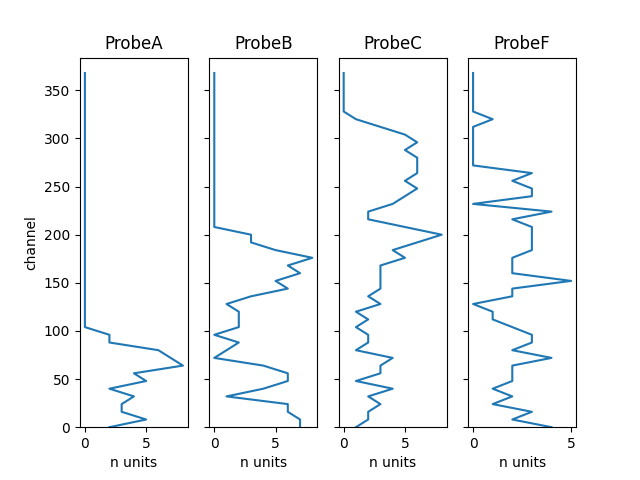

In [278]:
probes = session.good_units['probe'].unique()
ch_bins=np.arange(0,384,8)

units_by_channel = session.good_units[['probe','peak_channel']].value_counts()

fig,ax=plt.subplots(1,len(probes))

for ip,pr in enumerate(probes):
    unit_hist,edges=np.histogram(units_by_channel[pr].sort_index().index,bins=ch_bins)
    ax[ip].plot(unit_hist,ch_bins[:-1])
    ax[ip].set_ylim([0,384])
    ax[ip].set_xlabel('n units')
    ax[ip].set_title('Probe'+pr)
    if ip>0:
        ax[ip].set_yticklabels([])
    else:
        ax[ip].set_ylabel('channel')
        

In [279]:
#estimate fraction of units in cortex


#input channel rage and probe, caculate the fraction of units contained there
sel_probe='F'
channel_range=[120,350]

units_in_range=len(session.good_units.query('probe == @sel_probe and \
                                           peak_channel >= @channel_range[0] and \
                                           peak_channel < @channel_range[1]'))

probe_units=len(session.good_units.query('probe == @sel_probe'))

print('Probe'+sel_probe+' fraction units in channel range:')
print(units_in_range/probe_units)



ProbeF fraction units in channel range:
0.574468085106383


### Plot rasters -- sorted by stimulus duration

<IPython.core.display.Javascript object>


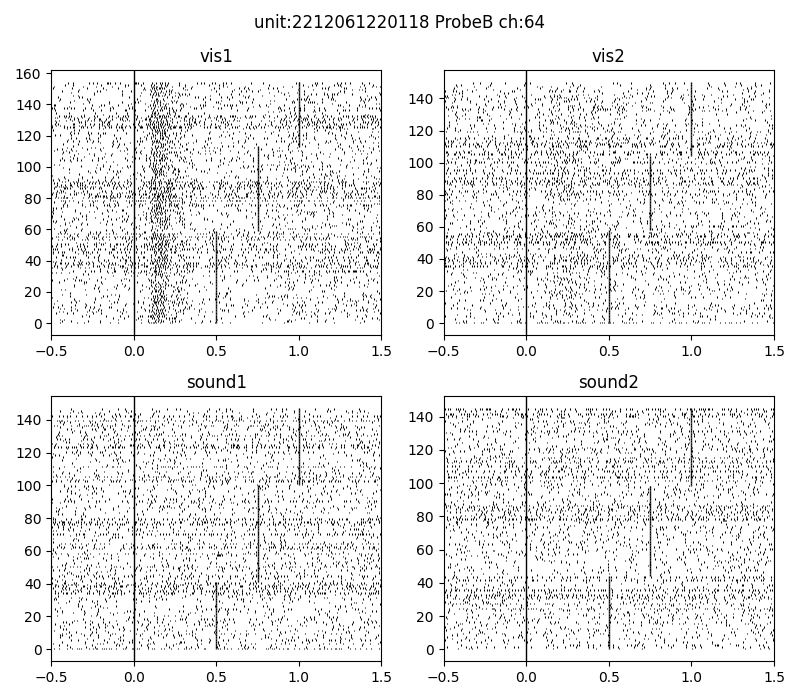

In [280]:
#Plot rasters: sort by stimulus duration

#select unit either by its location in the unit table or its ID    
unit_id=session.good_units.index[145]
# unit_id=10121

fig,ax=plt.subplots(2,2,figsize=(8,7))
ax=ax.flatten()
stim_types=['vis1','vis2','sound1','sound2']

color_options = ['green','blue','red','orange']

trial_color_map = {}
for ii,ss in enumerate(stim_types):
    trial_color_map[ss]=color_options[ii]


for si,ss in enumerate(stim_types):
    stim_trials = session.trials[session.trials['trialStimID']==ss]
    stim_trials_sorted = stim_trials.sort_values(by='trial_stim_dur',axis=0,ascending=True)
    
    sel_trials = session.trial_da.sel(trials=stim_trials_sorted.index.values)
    
    #find the ilocs of block transitions
    sel_trials_table = session.trials.loc[stim_trials.index.values]
    column_changes = sel_trials_table['trialstimRewarded'].shift() != sel_trials_table['trialstimRewarded']
    block_changes = sel_trials_table[column_changes]
    
    for it,tt in enumerate(sel_trials.trials.values):
        trial_spikes = sel_trials.sel(unit_id=unit_id,trials=tt)
        trial_color=[]

        trial_color = trial_color_map[session.trials['trialStimID'][tt]]

        trial_spike_times = trial_spikes.time[trial_spikes.values.astype('bool')]
        ax[si].vlines(trial_spike_times,ymin=it,ymax=it+1,linewidth=0.75,color='k')
        
        ax[si].vlines(stim_trials_sorted['trial_stim_dur'].loc[tt],ymin=it-.01,ymax=it+1.01,linewidth=1,color='k')

    if len(block_changes)>1:
        if block_changes.iloc[0]['trialstimRewarded']=='vis1':
            start_block=1
        elif block_changes.iloc[0]['trialstimRewarded']=='sound1':
            start_block=0

        for xx in np.asarray([0,2,4])+start_block:
            start_iloc=sel_trials_table.index.get_loc(block_changes.index[xx])
            if (xx+1)>(len(block_changes)-1):
                end_iloc=len(sel_trials_table)
            else:
                end_iloc=sel_trials_table.index.get_loc(block_changes.index[xx+1])
            temp_patch=patches.Rectangle([-0.5,start_iloc],1.5,end_iloc-start_iloc,
                                        color=[0.5,0.5,0.5],alpha=0.15)
            ax[si].add_patch(temp_patch)
        
    ax[si].set_xlim([-0.5,1.5])

    ax[si].axvline(0,color='k',linewidth=1)

    ax[si].set_title(ss)

fig.suptitle('unit:'+str(unit_id)+' Probe'+session.good_units['probe'].loc[unit_id]+
             ' ch:'+str(session.good_units['peak_channel'].loc[unit_id]))

fig.tight_layout()



### Plot heatmaps

In [281]:
#Average & normalize responses of each unit to each stimulus
gwindow = sg.gaussian(15, std=5)

#find baseline mean and std per unit
baseline_mean_per_trial=session.trial_da.sel(time=slice(-0.5,-0.4)).mean(dim=["time"])
baseline_mean=baseline_mean_per_trial.mean(dim="trials").values
baseline_std=baseline_mean_per_trial.std(dim="trials").values

#find unique stimuli
stimuli = np.unique(session.trials['trialStimID'])

#remove catch trials for this plot
stimuli = stimuli[stimuli!='catch']

#pre-allocate array for average
unit_frs_by_stim = np.zeros((len(session.trial_da.unit_id),len(session.trial_da.time),len(stimuli)))

#normalize each unit's avg FRs to its baseline  FR
for ss,stim in enumerate(stimuli):
    stim_trials = (session.trials.query('trialStimID==@stim')).index.values
    unit_frs_by_stim[:,:,ss] = session.trial_da.sel(trials=stim_trials).mean(dim="trials").values
    
    # z-score each unit rel to its baseline
    unit_frs_by_stim[:,:,ss] = ((unit_frs_by_stim[:,:,ss].T- baseline_mean.T)/baseline_std.T).T
    
    for iu in range(0,len(session.trial_da.unit_id)):
        unit_frs_by_stim[iu,:,ss]=sg.convolve(unit_frs_by_stim[iu,:,ss],
                                                gwindow,mode='same')/np.sum(gwindow)

In [282]:
#Find/define probe borders for plotting

probe_borders=np.where(session.good_units['probe'].iloc[:-1].values!=session.good_units['probe'].iloc[1:].values)[0]
all_edges=np.hstack([0,probe_borders,len(session.good_units)])
midpoints=all_edges[:-1]+(all_edges[1:]-all_edges[:-1])/2
probe_labels=session.good_units['probe'].iloc[midpoints.astype('int')].values

<IPython.core.display.Javascript object>


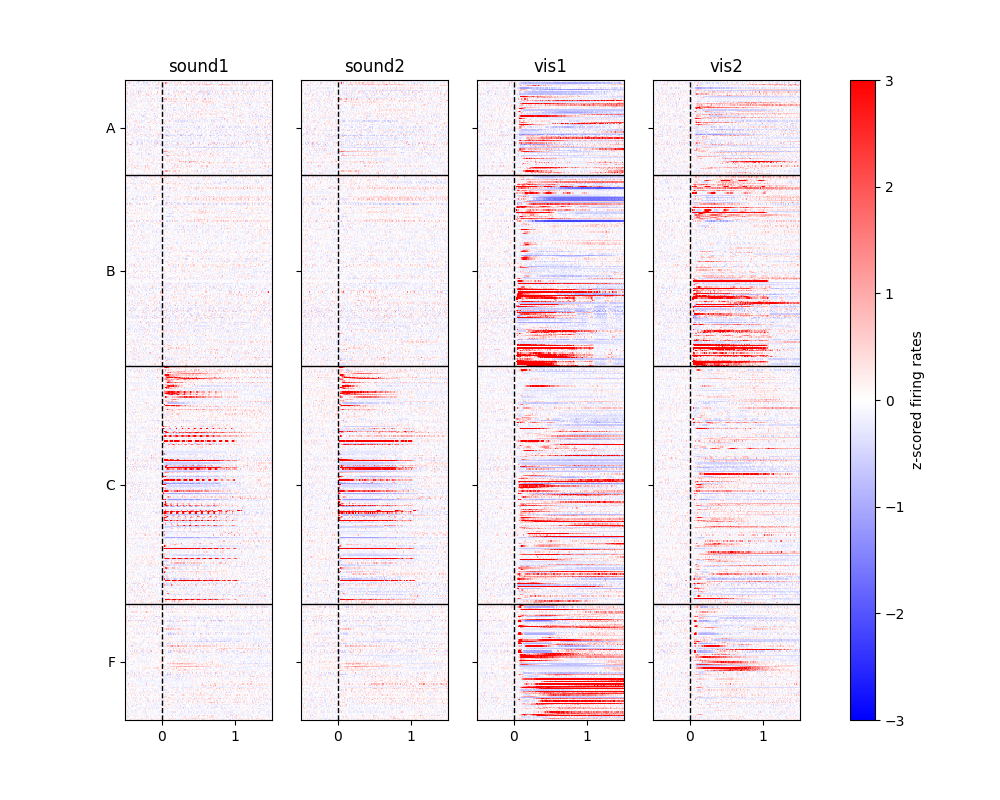

Text(0, 0.5, 'z-scored firing rates')

In [283]:
# plot heatmaps
# ordered by ascending channel number - top is tip of probe

fig,ax=plt.subplots(1,4,figsize=(10,8))
for xx in range(0,len(stimuli)): 
    im = ax[xx].imshow(unit_frs_by_stim[:,:,xx],aspect='auto',vmin=-3,vmax=3,
                   cmap=plt.get_cmap('bwr'),interpolation='none',
                   extent=(-time_before_flash,trial_duration-time_before_flash,
                           0,unit_frs_by_stim.shape[0]))
    
    ax[xx].axvline(0,color='k',linestyle='--',linewidth=1)
    ax[xx].set_title(stimuli[xx])
    ax[xx].set_xlim(-0.5,1.5)
    ax[xx].hlines(unit_frs_by_stim.shape[0]-probe_borders,xmin=-0.5,xmax=1.5,
                   color='k',linewidth=1)
    ax[xx].set_yticks(unit_frs_by_stim.shape[0]-midpoints)
    ax[xx].set_yticklabels(probe_labels)
    if xx>0:
        ax[xx].set_yticklabels([])

# this adjusts the other plots to make space for the colorbar
fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.3) 
cax = plt.axes([0.85, 0.1, 0.025, 0.8])
cbar = fig.colorbar(im, cax=cax)
cbar.ax.set_ylabel('z-scored firing rates')


### Plot heatmaps by stimulus duration

In [284]:
#Find/define probe borders for plotting

probe_borders=np.where(session.good_units['probe'].iloc[:-1].values!=session.good_units['probe'].iloc[1:].values)[0]
all_edges=np.hstack([0,probe_borders,len(session.good_units)])
midpoints=all_edges[:-1]+(all_edges[1:]-all_edges[:-1])/2
probe_labels=session.good_units['probe'].iloc[midpoints.astype('int')].values

In [285]:
#Average & normalize responses of each unit to each stimulus

gwindow = sg.gaussian(15, std=5)

#find baseline mean and std per unit
baseline_mean_per_trial=session.trial_da.sel(time=slice(-0.5,-0.4)).mean(dim=["time"])
baseline_mean=baseline_mean_per_trial.mean(dim="trials").values
baseline_std=baseline_mean_per_trial.std(dim="trials").values

#find unique stimuli
stimuli = np.unique(session.trials['trialStimID'])

#remove catch trials for this plot
stimuli = stimuli[stimuli!='catch']

#find stimulus durations
stim_dur = session.trials['trial_stim_dur'].unique()
#remove duration = 0 for this plot
stim_dur = stim_dur[stim_dur!=0]

#pre-allocate array for average
unit_frs_by_stim = np.zeros((len(session.trial_da.unit_id),len(session.trial_da.time),len(stimuli),len(stim_dur)))

#loop through stimulus durations
for dd,dur in enumerate(stim_dur):
    #normalize each unit's avg FRs to its baseline  FR
    for ss,stim in enumerate(stimuli):
        
        stim_trials = (session.trials.query('trialStimID==@stim and trial_stim_dur==@dur')).index.values
        
#         baseline_mean_per_trial=session.trial_da.sel(time=slice(-0.5,-0.1),trials=stim_trials).mean(dim=["time"])
#         baseline_mean=baseline_mean_per_trial.mean(dim="trials").values
#         baseline_std=baseline_mean_per_trial.std(dim="trials").values
        
        unit_frs_by_stim[:,:,ss,dd] = session.trial_da.sel(trials=stim_trials).mean(dim="trials").values

        # z-score each unit rel to its baseline
        unit_frs_by_stim[:,:,ss,dd] = ((unit_frs_by_stim[:,:,ss,dd].T- baseline_mean.T)/baseline_std.T).T
        
        for iu in range(0,len(session.trial_da.unit_id)):
            unit_frs_by_stim[iu,:,ss,dd]=sg.convolve(unit_frs_by_stim[iu,:,ss,dd],
                                                     gwindow,mode='same')/np.sum(gwindow)
        

<IPython.core.display.Javascript object>


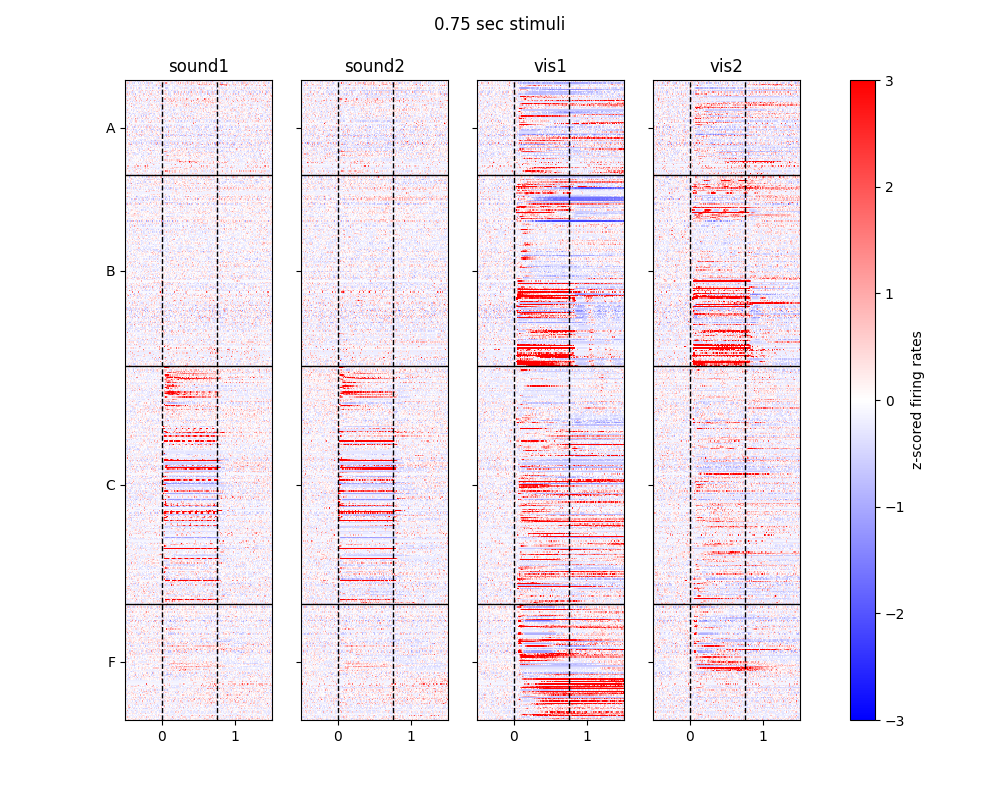

<IPython.core.display.Javascript object>


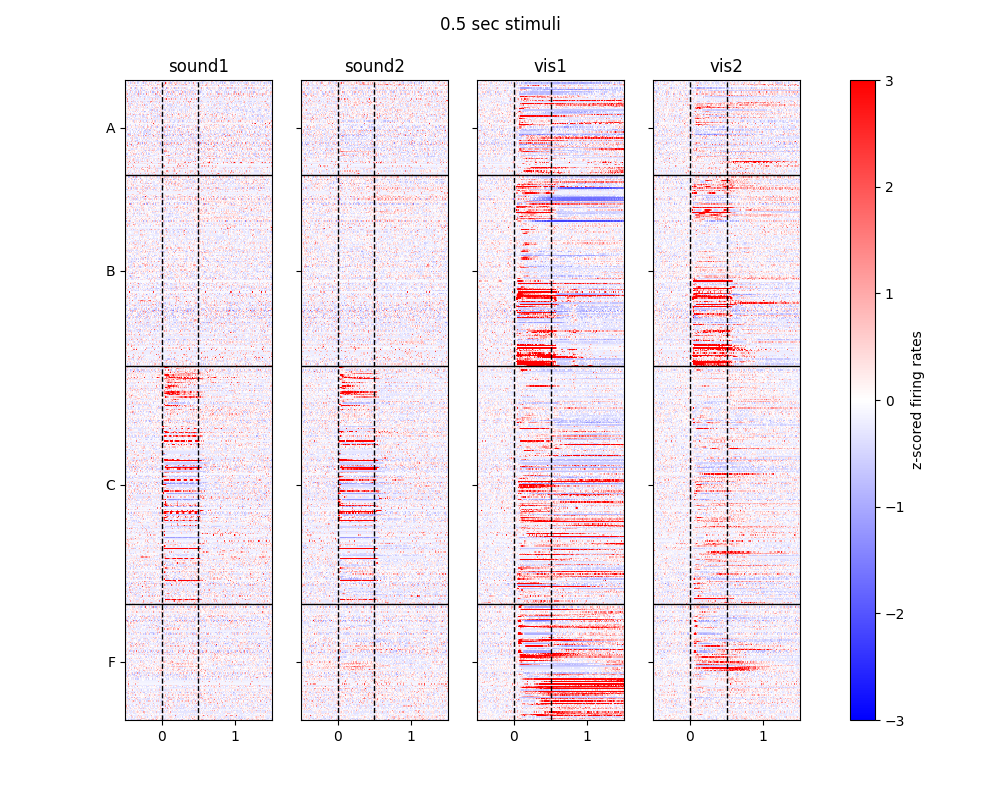

<IPython.core.display.Javascript object>


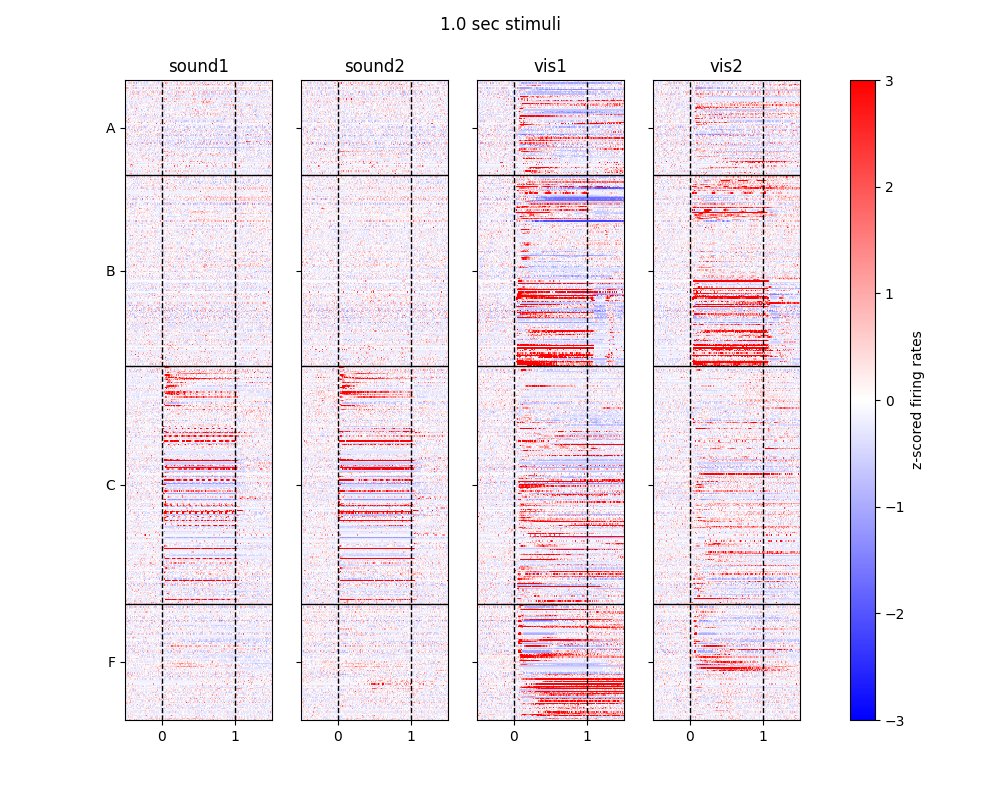

In [286]:
# plot heatmaps
# ordered by ascending channel number - top is tip of probe

for dd,dur in enumerate(stim_dur):
    fig,ax=plt.subplots(1,4,figsize=(10,8))
    for xx in range(0,len(stimuli)): 
        im = ax[xx].imshow(unit_frs_by_stim[:,:,xx,dd],aspect='auto',vmin=-3,vmax=3,
                       cmap=plt.get_cmap('bwr'),interpolation='none',
                       extent=(-time_before_flash,trial_duration-time_before_flash,
                               0,unit_frs_by_stim.shape[0]))

        ax[xx].axvline(0,color='k',linestyle='--',linewidth=1)
        ax[xx].axvline(dur,color='k',linestyle='--',linewidth=1)
        ax[xx].set_title(stimuli[xx])
        ax[xx].set_xlim(-0.5,1.5)
        ax[xx].hlines(unit_frs_by_stim.shape[0]-probe_borders,xmin=-0.5,xmax=1.5,
                       color='k',linewidth=1)
        ax[xx].set_yticks(unit_frs_by_stim.shape[0]-midpoints)
        ax[xx].set_yticklabels(probe_labels)
        if xx>0:
            ax[xx].set_yticklabels([])
    
    fig.suptitle(str(dur)+' sec stimuli')
    # this adjusts the other plots to make space for the colorbar
    fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.3) 
    cax = plt.axes([0.85, 0.1, 0.025, 0.8])
    cbar = fig.colorbar(im, cax=cax)
    cbar.ax.set_ylabel('z-scored firing rates')


In [133]:
# session.trial_da.sel(trials=stim_trials).mean(dim="trials").values.shape

### Plot PSTH according to probe and channel range

In [111]:
# choose channel range and probe

channel_range=[120,350]
sel_probe='F'

stimuli = np.unique(session.trials['trialStimID'])

stim_PSTHs = {}


sel_units = session.good_units.query('probe == @sel_probe and \
                                           peak_channel >= @channel_range[0] and \
                                           peak_channel < @channel_range[1]')
for stim in stimuli:

    stim_trials = session.trials.query('trialStimID == @stim').index

    stim_PSTHs[stim]=[]
    stim_PSTHs[stim].append(session.trial_da.sel(
                            unit_id=sel_units.index,
                            trials=stim_trials).mean(dim=['trials']))


In [112]:
# smooth each unit's PSTH
gwindow = sg.gaussian(50, std=25)
stim_PSTH_smooth={}
for stim in stimuli:
    stim_PSTH_smooth[stim]=np.zeros(stim_PSTHs[stim][0].shape)

    for iu,uu in enumerate(stim_PSTHs[stim][0].unit_id.values):
        stim_PSTH_smooth[stim][iu,:]=sg.convolve(stim_PSTHs[stim][0].sel(unit_id=uu),
                                                 gwindow,mode='same')/np.sum(gwindow)


<IPython.core.display.Javascript object>


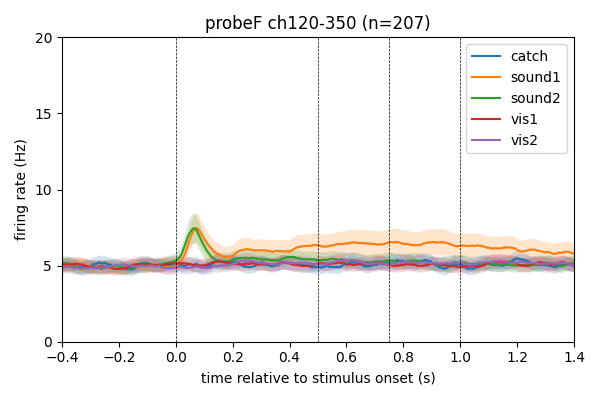

In [113]:
fig,ax=plt.subplots(1,1,figsize=(6,4))

for stim in stimuli:

    y=np.nanmean(stim_PSTH_smooth[stim],0)
    err=np.nanstd(stim_PSTH_smooth[stim],0)/np.sqrt(stim_PSTH_smooth[stim].shape[0])
    linex=ax.plot(stim_PSTHs[stim][0].time, y)
    plt.fill_between(stim_PSTHs[stim][0].time, y-err, y+err,
        alpha=0.2, edgecolor=None, facecolor=linex[0].get_color())


ax.set_title('probe'+sel_probe+' ch'+str(channel_range[0])+'-'+
             str(channel_range[1])+' (n='+str(len(stim_PSTHs[stim][0].unit_id))+')')
ax.set_xlabel('time relative to stimulus onset (s)')
ax.set_ylabel('firing rate (Hz)')
ax.set_xlim([-0.4,1.4])

ax.set_yticks([0,5,10,15,20])
ax.legend(stimuli)

stim_lines=[0,0.5,0.75,1]
for sl in stim_lines:
    ax.axvline(sl,color='k',linestyle='--',linewidth=0.5)

fig.tight_layout()

### Bin by trials - do responses change over the course of the session?

In [120]:
# choose channel range and probe

trial_bin_size = 40


channel_range=[0,100]
sel_probe='F'

stim = 'sound2'

stim_PSTHs = {}

sel_units = session.good_units.query('probe == @sel_probe and \
                                           peak_channel >= @channel_range[0] and \
                                           peak_channel < @channel_range[1]')

stim_trials = session.trials.query('trialStimID == @stim').index

trial_bins = np.arange(0,len(stim_trials),trial_bin_size)

mean_stim_PSTH = session.trial_da.sel(unit_id=sel_units.index,
                                      trials=stim_trials).mean(dim=['trials'])

trial_bin_PSTH = np.zeros((mean_stim_PSTH.shape[0],
                           mean_stim_PSTH.shape[1],
                           np.ceil(len(stim_trials)/trial_bin_size).astype(int)))

for it,tt in enumerate(trial_bins):

    trial_bin_PSTH[:,:,it]=session.trial_da.sel(unit_id=sel_units.index,
                                                trials=stim_trials[tt:tt+trial_bin_size]).mean(dim=['trials'])

# smooth each unit's PSTH
gwindow = sg.gaussian(50, std=25)
trial_bin_PSTH_smooth=np.zeros((trial_bin_PSTH.shape))

for it in range(0,trial_bin_PSTH.shape[2]):
    for iu in range(0,trial_bin_PSTH.shape[0]):
        trial_bin_PSTH_smooth[iu,:,it]=sg.convolve(trial_bin_PSTH[iu,:,it],gwindow,mode='same')/np.sum(gwindow)


<IPython.core.display.Javascript object>


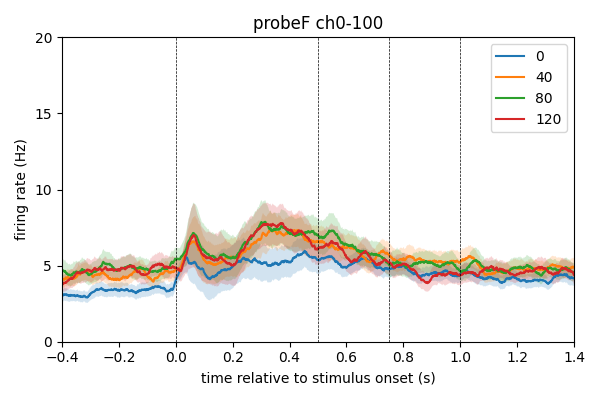

In [121]:
fig,ax=plt.subplots(1,1,figsize=(6,4))

for it in range(0,trial_bin_PSTH.shape[2]):
    
    y=np.nanmean(trial_bin_PSTH_smooth[:,:,it],0)
    err=np.nanstd(trial_bin_PSTH_smooth[:,:,it],0)/np.sqrt(trial_bin_PSTH_smooth[:,:,it].shape[0])
    linex=ax.plot(mean_stim_PSTH[0].time, y)
    plt.fill_between(mean_stim_PSTH[0].time, y-err, y+err,
        alpha=0.2, edgecolor=None, facecolor=linex[0].get_color())


ax.set_title('probe'+sel_probe+' ch'+str(channel_range[0])+'-'+
             str(channel_range[1]))
ax.set_xlabel('time relative to stimulus onset (s)')
ax.set_ylabel('firing rate (Hz)')
ax.set_xlim([-0.4,1.4])

ax.set_yticks([0,5,10,15,20])
ax.legend(trial_bins)

stim_lines=[0,0.5,0.75,1]
for sl in stim_lines:
    ax.axvline(sl,color='k',linestyle='--',linewidth=0.5)

fig.tight_layout()

### area-specific plots

In [ ]:
# heatmaps

#Average & normalize responses of each unit to each stimulus
gwindow = sg.gaussian(15, std=5)

#find baseline mean and std per unit
baseline_mean_per_trial=session.trial_da.sel(time=slice(-0.5,-0.4)).mean(dim=["time"])
baseline_mean=baseline_mean_per_trial.mean(dim="trials").values
baseline_std=baseline_mean_per_trial.std(dim="trials").values

#find unique stimuli
stimuli = np.unique(session.trials['trialStimID'])

#remove catch trials for this plot
stimuli = stimuli[stimuli!='catch']

#pre-allocate array for average
unit_frs_by_stim = np.zeros((len(session.trial_da.unit_id),len(session.trial_da.time),len(stimuli)))

#normalize each unit's avg FRs to its baseline  FR
for ss,stim in enumerate(stimuli):
    stim_trials = (session.trials.query('trialStimID==@stim')).index.values
    unit_frs_by_stim[:,:,ss] = session.trial_da.sel(trials=stim_trials).mean(dim="trials").values
    
    # z-score each unit rel to its baseline
    unit_frs_by_stim[:,:,ss] = ((unit_frs_by_stim[:,:,ss].T- baseline_mean.T)/baseline_std.T).T
    
    for iu in range(0,len(session.trial_da.unit_id)):
        unit_frs_by_stim[iu,:,ss]=sg.convolve(unit_frs_by_stim[iu,:,ss],
                                                gwindow,mode='same')/np.sum(gwindow)

In [ ]:
#Find/define probe borders for plotting

probe_borders=np.where(session.good_units['probe'].iloc[:-1].values!=session.good_units['probe'].iloc[1:].values)[0]
all_edges=np.hstack([0,probe_borders,len(session.good_units)])
midpoints=all_edges[:-1]+(all_edges[1:]-all_edges[:-1])/2
probe_labels=session.good_units['probe'].iloc[midpoints.astype('int')].values

In [322]:
session.good_units['area'].unique()

array([nan, 'DG-mo', 'DG-sg', 'CA3', 'DG-po', 'CA1', 'VISp6b', 'VISp6a',
       'TEa6b', 'TEa6a', 'TEa5', 'VISli5', 'DP', 'ILA6a', 'ORBm6a',
       'PL6a', 'MOs6a', 'MOs5'], dtype=object)

### loop through sessions, find number of units, trials, hit rate, false alarm rate

In [4]:
#define whether trial stimuli were in the rewarded modality

def trialStimInModality(trials):

    trialStimInRewardedModality = np.zeros(len(trials)).astype(bool)
    trialRewardedModality = []
    trialStimModality = []

    for tt,trial in trials.iterrows():

        if trial['trialStimID']!='catch':
            rew_mod=trial['trialstimRewarded'][:-1]
            stim_mod=trial['trialStimID'][:-1]

            trialRewardedModality.append(rew_mod)
            trialStimModality.append(stim_mod)

            trialStimInRewardedModality[tt] = stim_mod==rew_mod
        else:
            trialRewardedModality.append('')
            trialStimModality.append('')

    trials['trialStimModality']=trialStimModality
    trials['trialRewardedModality']=trialRewardedModality   
    trials['trialStimInRewardedModality']=trialStimInRewardedModality
    
    return(trials)

In [5]:
# loop through sessions

session_date=[]
mouse_id=[]

#units
total_n=[]
probeA_n=[]
probeB_n=[]
probeC_n=[]
probeD_n=[]
probeE_n=[]
probeF_n=[]

#trials
n_trials=[]
n_vis_block_trials=[]
n_aud_block_trials=[]
n_catch=[]

vis_go_500=[]
vis_go_750=[]
vis_go_1000=[]

vis_nogo_500=[]
vis_nogo_750=[]
vis_nogo_1000=[]

aud_go_500=[]
aud_go_750=[]
aud_go_1000=[]

aud_nogo_500=[]
aud_nogo_750=[]
aud_nogo_1000=[]

hit_rate=[]
fa_rate=[]
fa_rel_rate=[]
fa_irrel_rate=[]

for ss in main_path:
    session=Session(path=ss) 
    
    # get mouse number and recording date
    sub1 = "recordings"
    sub2 = "\\processed"
    idx1 = ss.index(sub1)
    idx2 = ss.index(sub2)
    exp_folder=ss[idx1 + len(sub1) + 1: idx2]
    mouse=exp_folder[-6:]
    exp=exp_folder[:-7]
    
    session_date.append(exp)
    mouse_id.append(mouse)
    
    session.trials = trialStimInModality(session.trials)
    
    #unit info table
    total_n.append(len(session.good_units))
    probeA_n.append(len(session.good_units.query('probe == "A"')))
    probeB_n.append(len(session.good_units.query('probe == "B"')))
    probeC_n.append(len(session.good_units.query('probe == "C"')))
    probeD_n.append(len(session.good_units.query('probe == "D"')))
    probeE_n.append(len(session.good_units.query('probe == "E"')))
    probeF_n.append(len(session.good_units.query('probe == "F"')))
    
    #trial info table
    n_trials.append(len(session.trials))
    n_vis_block_trials.append(len(session.trials.query('trialRewardedModality == "vis"')))
    n_aud_block_trials.append(len(session.trials.query('trialRewardedModality == "sound"')))
    
    vis_go_500.append(len(session.trials.query('trial_stim_dur == 0.5 and trialStimID == "vis1"')))
    vis_go_750.append(len(session.trials.query('trial_stim_dur == 0.75 and trialStimID == "vis1"')))
    vis_go_1000.append(len(session.trials.query('trial_stim_dur == 1.0 and trialStimID == "vis1"')))

    vis_nogo_500.append(len(session.trials.query('trial_stim_dur == 0.5 and trialStimID == "vis2"')))
    vis_nogo_750.append(len(session.trials.query('trial_stim_dur == 0.75 and trialStimID == "vis2"')))
    vis_nogo_1000.append(len(session.trials.query('trial_stim_dur == 1.0 and trialStimID == "vis2"')))

    aud_go_500.append(len(session.trials.query('trial_stim_dur == 0.5 and trialStimID == "sound1"')))
    aud_go_750.append(len(session.trials.query('trial_stim_dur == 0.75 and trialStimID == "sound1"')))
    aud_go_1000.append(len(session.trials.query('trial_stim_dur == 1.0 and trialStimID == "sound1"')))

    aud_nogo_500.append(len(session.trials.query('trial_stim_dur == 0.5 and trialStimID == "sound2"')))
    aud_nogo_750.append(len(session.trials.query('trial_stim_dur == 0.75 and trialStimID == "sound2"')))
    aud_nogo_1000.append(len(session.trials.query('trial_stim_dur == 1.0 and trialStimID == "sound2"')))
    
    n_catch.append(len(session.trials.query('trialStimID == "catch"')))
    
    hit_rate.append(session.trials.query('trialStimID == trialstimRewarded')['trial_response'].mean())
    fa_rate.append(session.trials.query('trialStimID != trialstimRewarded')['trial_response'].mean())
    
    fa_rel_rate.append(session.trials.query('trialStimID != trialstimRewarded and \
                                      trialStimInRewardedModality == True')['trial_response'].mean())
    fa_irrel_rate.append(session.trials.query('trialStimID != trialstimRewarded and \
                                      trialStimInRewardedModality == False')['trial_response'].mean())
    

In [6]:
# make dataframes

unit_summary={
    'session_date':session_date,
    'mouseID':mouse_id,
    'total_n':total_n,
    'probeA_n':probeA_n,
    'probeA_frac_ctx':np.zeros(len(total_n)),
    'probeB_n':probeB_n,
    'probeB_frac_ctx':np.zeros(len(total_n)),
    'probeC_n':probeC_n,
    'probeC_frac_ctx':np.zeros(len(total_n)),
    'probeD_n':probeD_n,
    'probeD_frac_ctx':np.zeros(len(total_n)),
    'probeE_n':probeE_n,
    'probeE_frac_ctx':np.zeros(len(total_n)),
    'probeF_n':probeF_n,
    'probeF_frac_ctx':np.zeros(len(total_n)),
}

unit_summary_df=pd.DataFrame.from_dict(unit_summary)

trial_summary={
    'session_date':session_date,
    'mouseID':mouse_id,
    'n_trials':n_trials,
    'n_vis_block_trials':n_vis_block_trials,
    'n_aud_block_trials':n_aud_block_trials,
    'n_catch':n_catch,

    'vis_go_500':vis_go_500,
    'vis_go_750':vis_go_750,
    'vis_go_1000':vis_go_1000,

    'vis_nogo_500':vis_nogo_500,
    'vis_nogo_750':vis_nogo_750,
    'vis_nogo_1000':vis_nogo_1000,

    'aud_go_500':aud_go_500,
    'aud_go_750':aud_go_750,
    'aud_go_1000':aud_go_1000,

    'aud_nogo_500':aud_nogo_500,
    'aud_nogo_750':aud_nogo_750,
    'aud_nogo_1000':aud_nogo_1000,

    'hit_rate':hit_rate,
    'fa_rate':fa_rate,
    'fa_rel_rate':fa_rel_rate,
    'fa_irrel_rate':fa_irrel_rate,
}

trial_summary_df=pd.DataFrame.from_dict(trial_summary)

In [7]:
unit_summary_df

session_date mouseID  total_n  probeA_n  probeA_frac_ctx  probeB_n  \
0  2022-07-26_14-09-36  620263      537         0              0.0       156   
1  2022-07-27_13-57-17  620263      413        26              0.0       103   
2  2022-08-02_15-40-19  620264      452        52              0.0        89   
3  2022-09-19_13-48-26  628801      792       204              0.0       134   
4  2022-09-26_12-48-09  636397      380       122              0.0        82   
5  2022-09-27_11-37-08  636397      516        89              0.0        41   
6  2022-12-05_13-08-02  644547      705       155              0.0       125   
7  2022-12-06_12-35-35  644547      524        79              0.0       156   
8  2023-01-17_11-39-17  646318      537         9              0.0       103   
9  2023-01-18_10-44-55  646318      619       157              0.0       126   

   probeB_frac_ctx  probeC_n  probeC_frac_ctx  probeD_n  probeD_frac_ctx  \
0              0.0       174              0.0         0              0.0   
1              0.0        72              0.0         0              0.0   
2              0.0        91              0.0         0              0.0   
3              0.0       146              0.0         0              0.0   
4              0.0        46              0.0         0              0.0   
5              0.0       166              0.0         0              0.0   
6              0.0       181              0.0         0              0.0   
7              0.0       195              0.0         0              0.0   
8              0.0       151              0.0         0              0.0   
9              0.0       157              0.0         0              0.0   

   probeE_n  probeE_frac_ctx  probeF_n  probeF_frac_ctx  
0         0              0.0       207              0.0  
1         0              0.0       212              0.0  
2         0              0.0       220              0.0  
3         0              0.0       308              0.0  
4         0              0.0       130              0.0  
5         0              0.0       220              0.0  
6         0              0.0       244              0.0  
7         0              0.0        94              0.0  
8         0              0.0       274              0.0  
9         0              0.0       179              0.0

In [8]:
trial_summary_df

session_date mouseID  n_trials  n_vis_block_trials  \
0  2022-07-26_14-09-36  620263       673                 615   
1  2022-07-27_13-57-17  620263       692                 615   
2  2022-08-02_15-40-19  620264       702                   0   
3  2022-09-19_13-48-26  628801       454                 400   
4  2022-09-26_12-48-09  636397       629                   0   
5  2022-09-27_11-37-08  636397       496                   0   
6  2022-12-05_13-08-02  644547       701                 644   
7  2022-12-06_12-35-35  644547       678                 596   
8  2023-01-17_11-39-17  646318       675                   0   
9  2023-01-18_10-44-55  646318       671                   0   

   n_aud_block_trials  n_catch  vis_go_500  vis_go_750  vis_go_1000  \
0                   0       58          59          41           58   
1                   0       77          44          70           43   
2                 627       75          56          51           49   
3                   0       54          35          43           26   
4                 565       64          54          42           44   
5                 455       41          38          45           32   
6                   0       57          59          50           55   
7                   0       82          59          54           41   
8                 611       64          36          60           56   
9                 618       53          48          42           63   

   vis_nogo_500  ...  aud_go_500  aud_go_750  aud_go_1000  aud_nogo_500  \
0            53  ...          48          49           56            54   
1            45  ...          45          50           57            52   
2            44  ...          46          51           63            51   
3            27  ...          35          34           31            22   
4            42  ...          50          51           44            45   
5            42  ...          35          46           35            34   
6            46  ...          58          65           37            59   
7            58  ...          41          59           47            44   
8            59  ...          53          51           52            53   
9            55  ...          61          48           49            48   

   aud_nogo_750  aud_nogo_1000  hit_rate   fa_rate  fa_rel_rate  fa_irrel_rate  
0            47             53  0.993671  0.066019     0.086667       0.057534  
1            58             45  0.987261  0.031776     0.059603       0.020833  
2            54             50  1.000000  0.011070     0.012903       0.010336  
3            43             34  0.980769  0.480000     0.556701       0.450593  
4            52             43  0.917241  0.142562     0.235714       0.104651  
5            30             48  0.905172  0.300000     0.383929       0.264925  
6            56             45  0.737805  0.014898     0.006250       0.018568  
7            54             47  0.980519  0.072519     0.033333       0.088235  
8            46             54  0.935897  0.219653     0.588235       0.065574  
9            47             59  0.974684  0.157895     0.402597       0.052925  

[10 rows x 22 columns]

In [11]:
# # save dataframes
# save_path=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\templeton pilot summary"

# unit_summary_df.to_csv(os.path.join(save_path,'unit_summary.csv'))
# trial_summary_df.to_csv(os.path.join(save_path,'trial_summary.csv'))